In [68]:
import os
from PIL import Image
import numpy as np
import cv2
import sys
sys.path.append("../")
from data_file.CBCT_preprocess import read_raw
import matplotlib.pyplot as plt

p_path = "/home/gabrielidis/These/medical_project//artefacts/results/expriment_1/big_endian/acquisition_1/predicted/450_predicted_image.png"
gt_path = "/home/gabrielidis/These/medical_project/artefacts/results/expriment_1/big_endian/acquisition_1/ground_truth/579_ground_truth_image.png"

In [69]:
predicted = cv2.imread(p_path,cv2.IMREAD_GRAYSCALE)
gt = cv2.imread(gt_path,cv2.IMREAD_GRAYSCALE)


(512, 512)

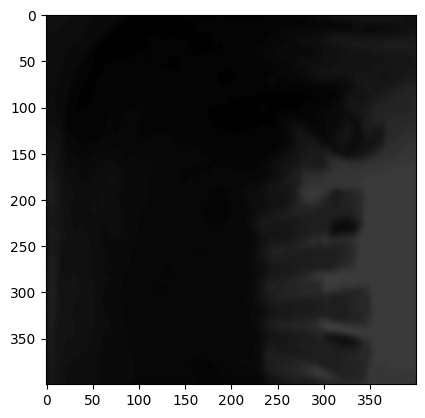

In [71]:
plt.imshow(cv2.resize(predicted,(400,400), interpolation=cv2.INTER_CUBIC), cmap= "gray")

In [72]:
predicted

array([[255, 255,  21, ...,  21,  21,  12],
       [255,  99,  21, ...,  21,  21,  21],
       [ 24,  18,  21, ...,  21,  21,  21],
       ...,
       [ 15,  18,  21, ...,  56,  56,  54],
       [ 15,  18,  21, ...,  56,  56,  56],
       [  9,  15,  18, ...,  56,  56,  27]], dtype=uint8)

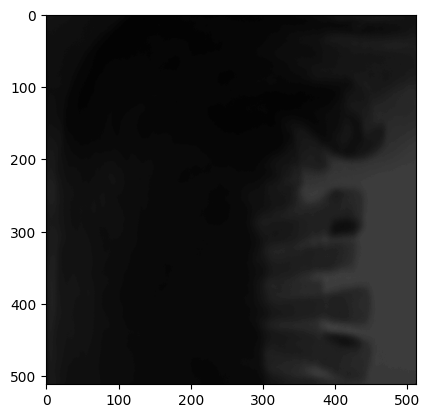

In [65]:
plt.imshow(predicted, cmap="gray")

In [51]:
predicted.tofile("test.raw")

In [54]:
test = read_raw("test.raw",(400,400))

MetaImage: M_ReadElementsData: data not read completely
   ideal = 320000 : actual = 262144


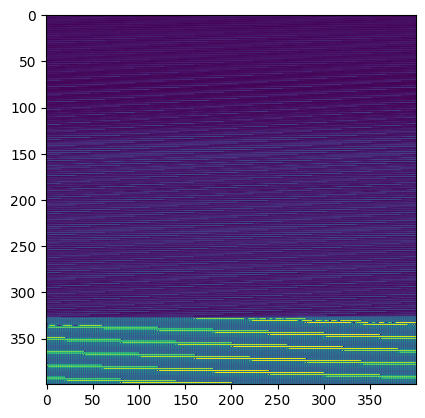

In [55]:
plt.imshow(test)